<center><h1>*Deep learning for Music Generation using Restricted Boltzmann Machine and TensorFlow*</h1></center>
***







<h1>Kaggle Notebook</h1>
</div>
***
***

<div>
    <h1>This notebook is summarizes the best of what has been done in the kernels. At First, I sort the public submissions by best score, and then choose languages by python. I can get the result as follow</h1>
</div>
***

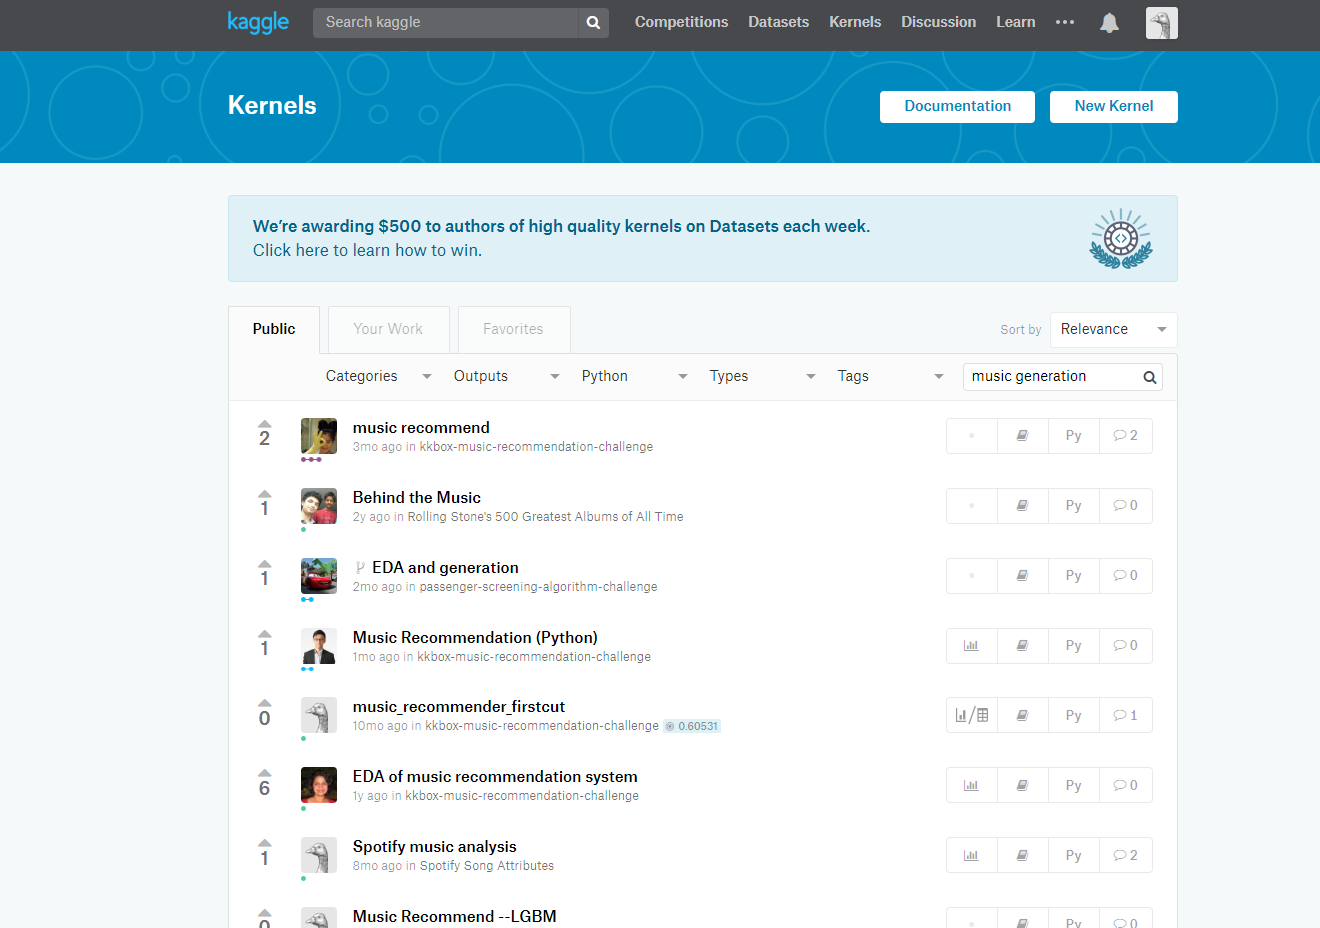

In [1]:
from IPython.display import Image
Image(filename='Img1.PNG')

<h2>As one can see that the kaggle has kernels mostly on recommendation and guessing a genre of song rather than generation<h2>

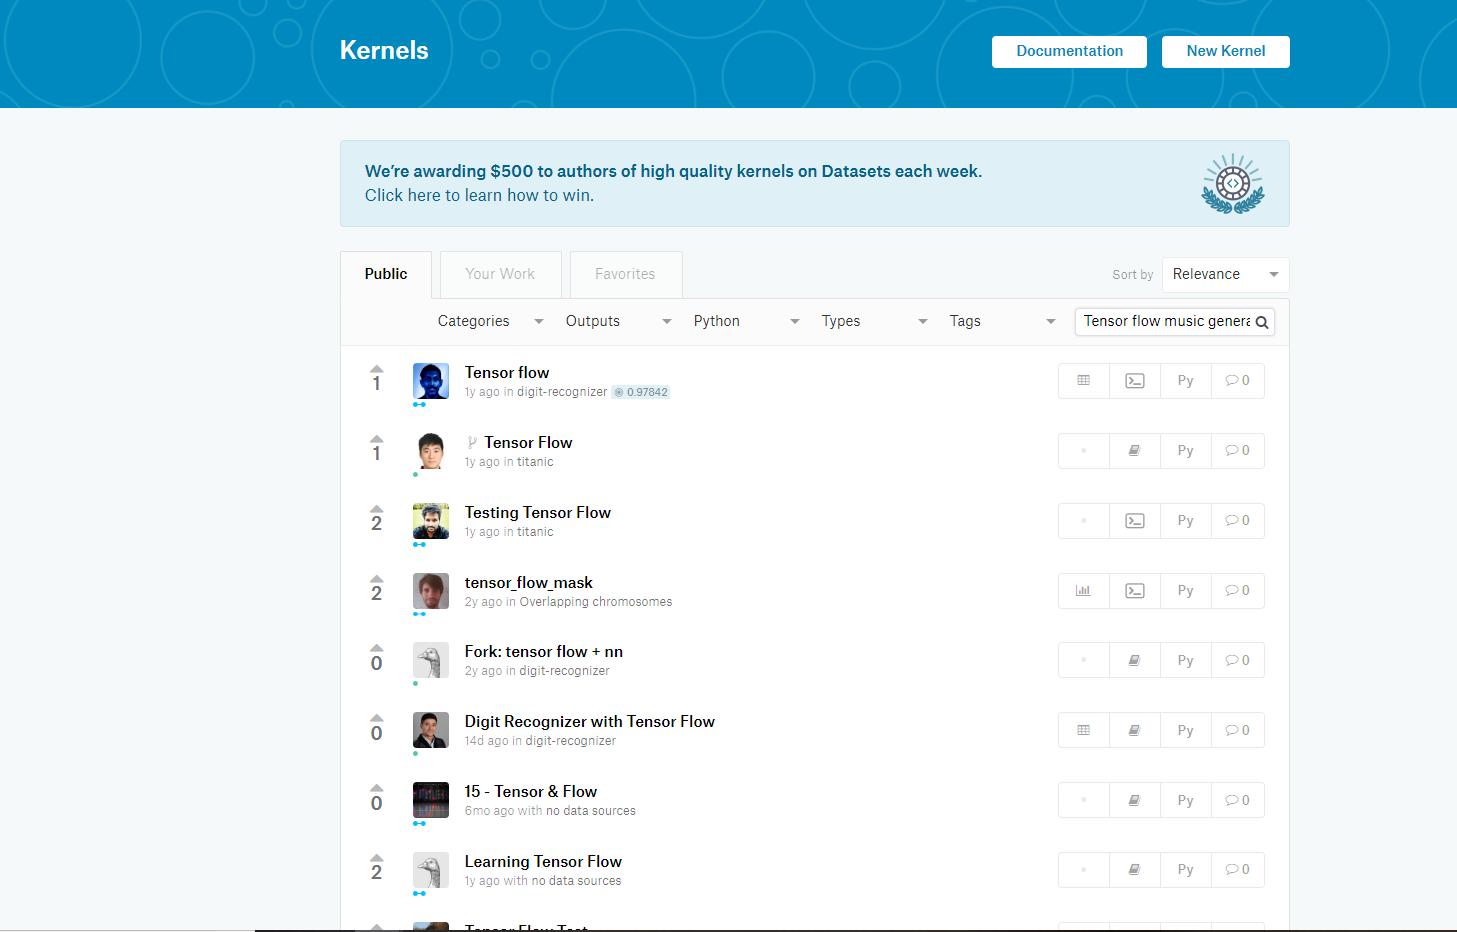

In [1]:
from IPython.display import Image
Image(filename='img2.PNG')










###  Hence major chunk of our project has been from github as source and Kaggle hasn't been the resource to explore or compare.

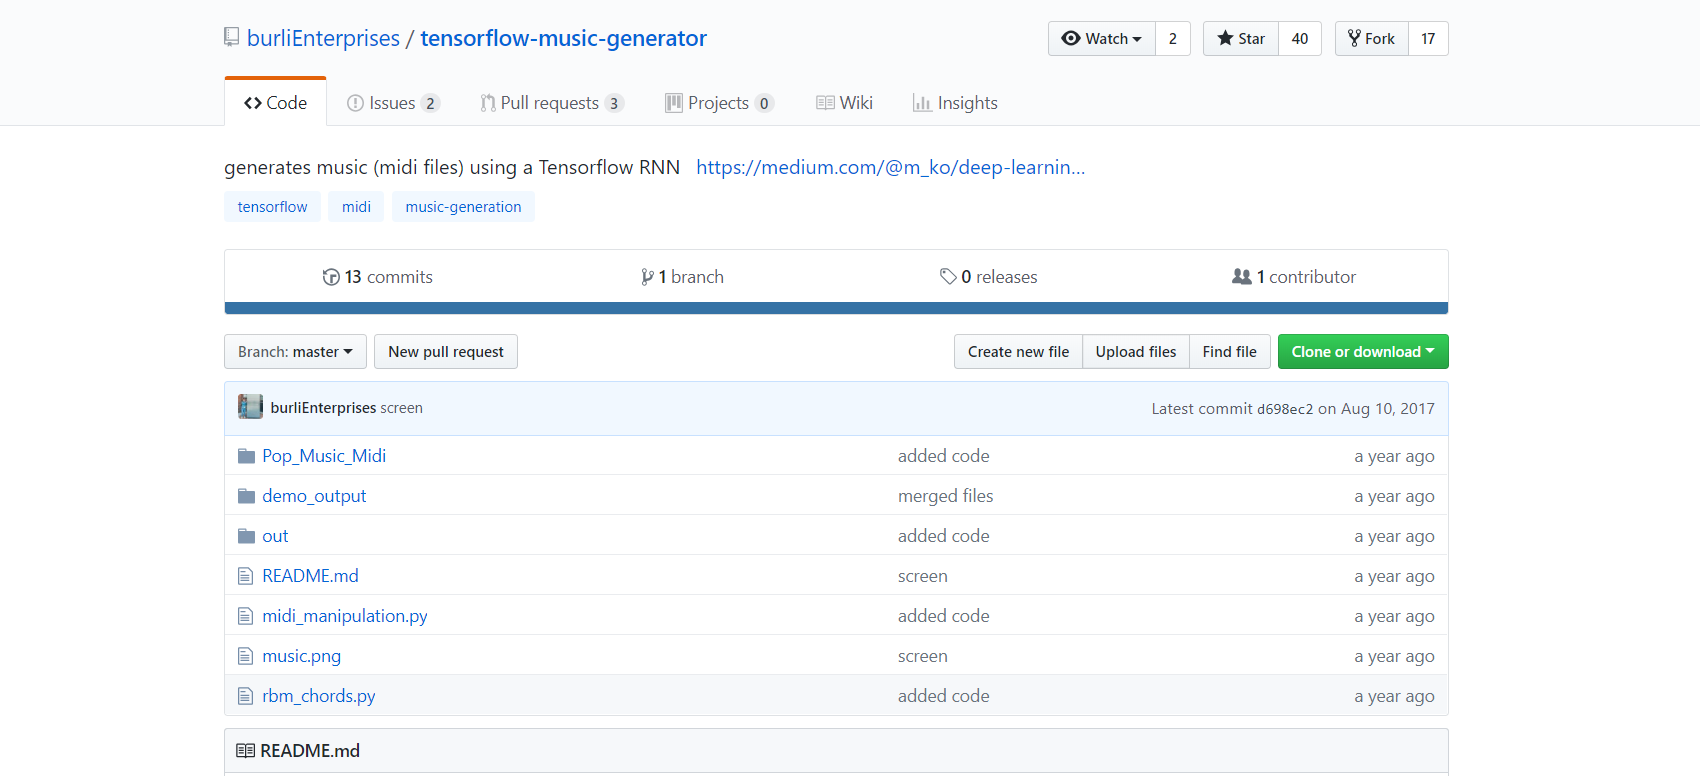

In [2]:
from IPython.display import Image
Image(filename='img3.PNG')

**The above git hub project proved useful as it uses RNN-Tensorflow**




In [4]:
#importing all the python libraries that we need for the Music Generation

In [3]:
import midi
import numpy as np


lowerBound = 24
upperBound = 102
span = upperBound-lowerBound


def midiToNoteStateMatrix(midifile, squash=True, span=span):
    pattern = midi.read_midifile(midifile)

    timeleft = [track[0].tick for track in pattern]

    posns = [0 for track in pattern]

    statematrix = []
    time = 0

    state = [[0,0] for x in range(span)]
    statematrix.append(state)
    condition = True
    while condition:
        if time % (pattern.resolution / 4) == (pattern.resolution / 8):
            # Crossed a note boundary. Create a new state, defaulting to holding notes
            oldstate = state
            state = [[oldstate[x][0],0] for x in range(span)]
            statematrix.append(state)
        for i in range(len(timeleft)): #For each track
            if not condition:
                break
            while timeleft[i] == 0:
                track = pattern[i]
                pos = posns[i]

                evt = track[pos]
                if isinstance(evt, midi.NoteEvent):
                    if (evt.pitch < lowerBound) or (evt.pitch >= upperBound):
                        pass
                        # print "Note {} at time {} out of bounds (ignoring)".format(evt.pitch, time)
                    else:
                        if isinstance(evt, midi.NoteOffEvent) or evt.velocity == 0:
                            state[evt.pitch-lowerBound] = [0, 0]
                        else:
                            state[evt.pitch-lowerBound] = [1, 1]
                elif isinstance(evt, midi.TimeSignatureEvent):
                    if evt.numerator not in (2, 4):
                        # We don't want to worry about non-4 time signatures. Bail early!
                        # print "Found time signature event {}. Bailing!".format(evt)
                        out =  statematrix
                        condition = False
                        break
                try:
                    timeleft[i] = track[pos + 1].tick
                    posns[i] += 1
                except IndexError:
                    timeleft[i] = None

            if timeleft[i] is not None:
                timeleft[i] -= 1

        if all(t is None for t in timeleft):
            break

        time += 1

    S = np.array(statematrix)
    statematrix = np.hstack((S[:, :, 0], S[:, :, 1]))
    statematrix = np.asarray(statematrix).tolist()
    return statematrix

def noteStateMatrixToMidi(statematrix, name="example", span=span):
    statematrix = np.array(statematrix)
    if not len(statematrix.shape) == 3:
        statematrix = np.dstack((statematrix[:, :span], statematrix[:, span:]))
    statematrix = np.asarray(statematrix)
    pattern = midi.Pattern()
    track = midi.Track()
    pattern.append(track)
    
    span = upperBound-lowerBound
    tickscale = 55
    
    lastcmdtime = 0
    prevstate = [[0,0] for x in range(span)]
    for time, state in enumerate(statematrix + [prevstate[:]]):  
        offNotes = []
        onNotes = []
        for i in range(span):
            n = state[i]
            p = prevstate[i]
            if p[0] == 1:
                if n[0] == 0:
                    offNotes.append(i)
                elif n[1] == 1:
                    offNotes.append(i)
                    onNotes.append(i)
            elif n[0] == 1:
                onNotes.append(i)
        for note in offNotes:
            track.append(midi.NoteOffEvent(tick=(time-lastcmdtime)*tickscale, pitch=note+lowerBound))
            lastcmdtime = time
        for note in onNotes:
            track.append(midi.NoteOnEvent(tick=(time-lastcmdtime)*tickscale, velocity=40, pitch=note+lowerBound))
            lastcmdtime = time
            
        prevstate = state
    
    eot = midi.EndOfTrackEvent(tick=1)
    track.append(eot)

    midi.write_midifile("{}.midi".format(name), pattern)

<h1> The above midi manipulation file helped us with generating chords that adhere to Pop music</h1>

<h1> Below link is the first kernel on Music generation.
https://www.kaggle.com/chetanmj23/pop-music-collection/kernels
    </h1>

**MIT License**

Copyright (c) 2018, Chetan M Jadhav, Manasa B Singekar, Gaurav Sonkar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**Creative common Attribution 3.0 license**

THE WORK (AS DEFINED BELOW) IS PROVIDED UNDER THE TERMS OF THIS CREATIVE COMMONS PUBLIC LICENSE ("CCPL" OR "LICENSE"). THE WORK IS PROTECTED BY COPYRIGHT AND/OR OTHER APPLICABLE LAW. ANY USE OF THE WORK OTHER THAN AS AUTHORIZED UNDER THIS LICENSE OR COPYRIGHT LAW IS PROHIBITED.

BY EXERCISING ANY RIGHTS TO THE WORK PROVIDED HERE, YOU ACCEPT AND AGREE TO BE BOUND BY THE TERMS OF THIS LICENSE. TO THE EXTENT THIS LICENSE MAY BE CONSIDERED TO BE A CONTRACT, THE LICENSOR GRANTS YOU THE RIGHTS CONTAINED HERE IN CONSIDERATION OF YOUR ACCEPTANCE OF SUCH TERMS AND CONDITIONS.

"Work" means the copyrightable work of authorship offered under the terms of this License.